# **Credit Card Fraud Detection**



#**Objective** : To develop a machine learning project on Credit Card Fraud Detection.


#**Data Source** : https://www.kaggle.com/mlg-ulb/creditcardfraud

#**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/creditcard.csv')

#**Describe Data**



In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
Genuine = len(df[df.Class == 0])
Fraud = len(df[df.Class == 1])
Genuine_percent = (Genuine / (Fraud + Genuine)) * 100
Fraud_percent = (Fraud / (Fraud + Genuine)) * 100

print("Number of Genuine transactions: ", Genuine)
print("Number of Fraud transactions: ", Fraud)
print("Percentage of Genuine transactions: {:.5f}".format(Genuine_percent))
print("Percentage of Fraud transactions: {:.5f}".format(Fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Genuine transactions: 99.82725
Percentage of Fraud transactions: 0.17275


#**Data Visualization**


Class
0    284315
1       492
dtype: int64


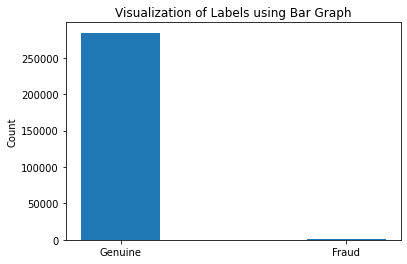

In [ ]:
labels = ["Genuine", "Fraud"]
fig, ax = plt.subplots()
count_classes = df.value_counts(df['Class'], sort = True)
ax.bar(labels, count_classes, width = 0.35)
ax.set_title("Visualization of Labels using Bar Graph")
ax.set_ylabel("Count")
print(count_classes)

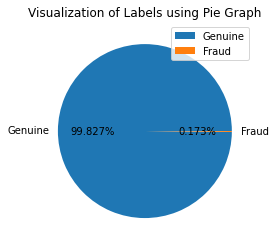

In [ ]:
labels = ["Genuine", "Fraud"]
fig, ax = plt.subplots()
count_classes = df.value_counts(df['Class'], sort = True)
ax.pie(count_classes, labels = labels, autopct = '%1.3f%%')
ax.set_title("Visualization of Labels using Pie Graph")
ax.legend();

## **Data Preprocessing**

In [ ]:
# Perform Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(["Amount", "Time"], inplace= True, axis= 1)

## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'NormalizedAmount'],
      dtype='object')

In [ ]:
#X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
X = df.drop(["Class"], axis = 1)
y = df["Class"]

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 252)
print("Shape of train_X: ", X_train.shape)
print("Shape of test_X: ", X_test.shape)

Shape of train_X:  (85442, 29)
Shape of test_X:  (199365, 29)


#**Modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

#Logistic Regression
model = LogisticRegression()

#Decision Tree
model1 = DecisionTreeClassifier()

# Random Forest
model2 = RandomForestClassifier(n_estimators= 100)

#**Model Evaluation**

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
logistic_regression_score = model.score(X_test, y_test)

model1.fit(X_train, y_train)
y1_pred = model1.predict(X_test)
decision_tree_score = model1.score(X_test, y_test)

model2.fit(X_train, y_train)
y2_pred = model2.predict(X_test)
random_forest_score = model2.score(X_test, y_test)

#**Prediction**

In [ ]:
print("Logistic Regression Score: ", logistic_regression_score)
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Logistic Regression Score:  0.9992476111654504
Decision Tree Score:  0.998966719333885
Random Forest Score:  0.9994984074436335


In [ ]:
y_pred
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)
print("Logistic Regression:\n\n", classification_report(y_test, y_pred))

Logistic Regression:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199032
           1       0.85      0.67      0.75       333

    accuracy                           1.00    199365
   macro avg       0.93      0.83      0.87    199365
weighted avg       1.00      1.00      1.00    199365



In [ ]:
y1_pred
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y1_pred)
print("Decision Tree:\n\n", classification_report(y_test, y1_pred))

Decision Tree:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199032
           1       0.70      0.68      0.69       333

    accuracy                           1.00    199365
   macro avg       0.85      0.84      0.84    199365
weighted avg       1.00      1.00      1.00    199365



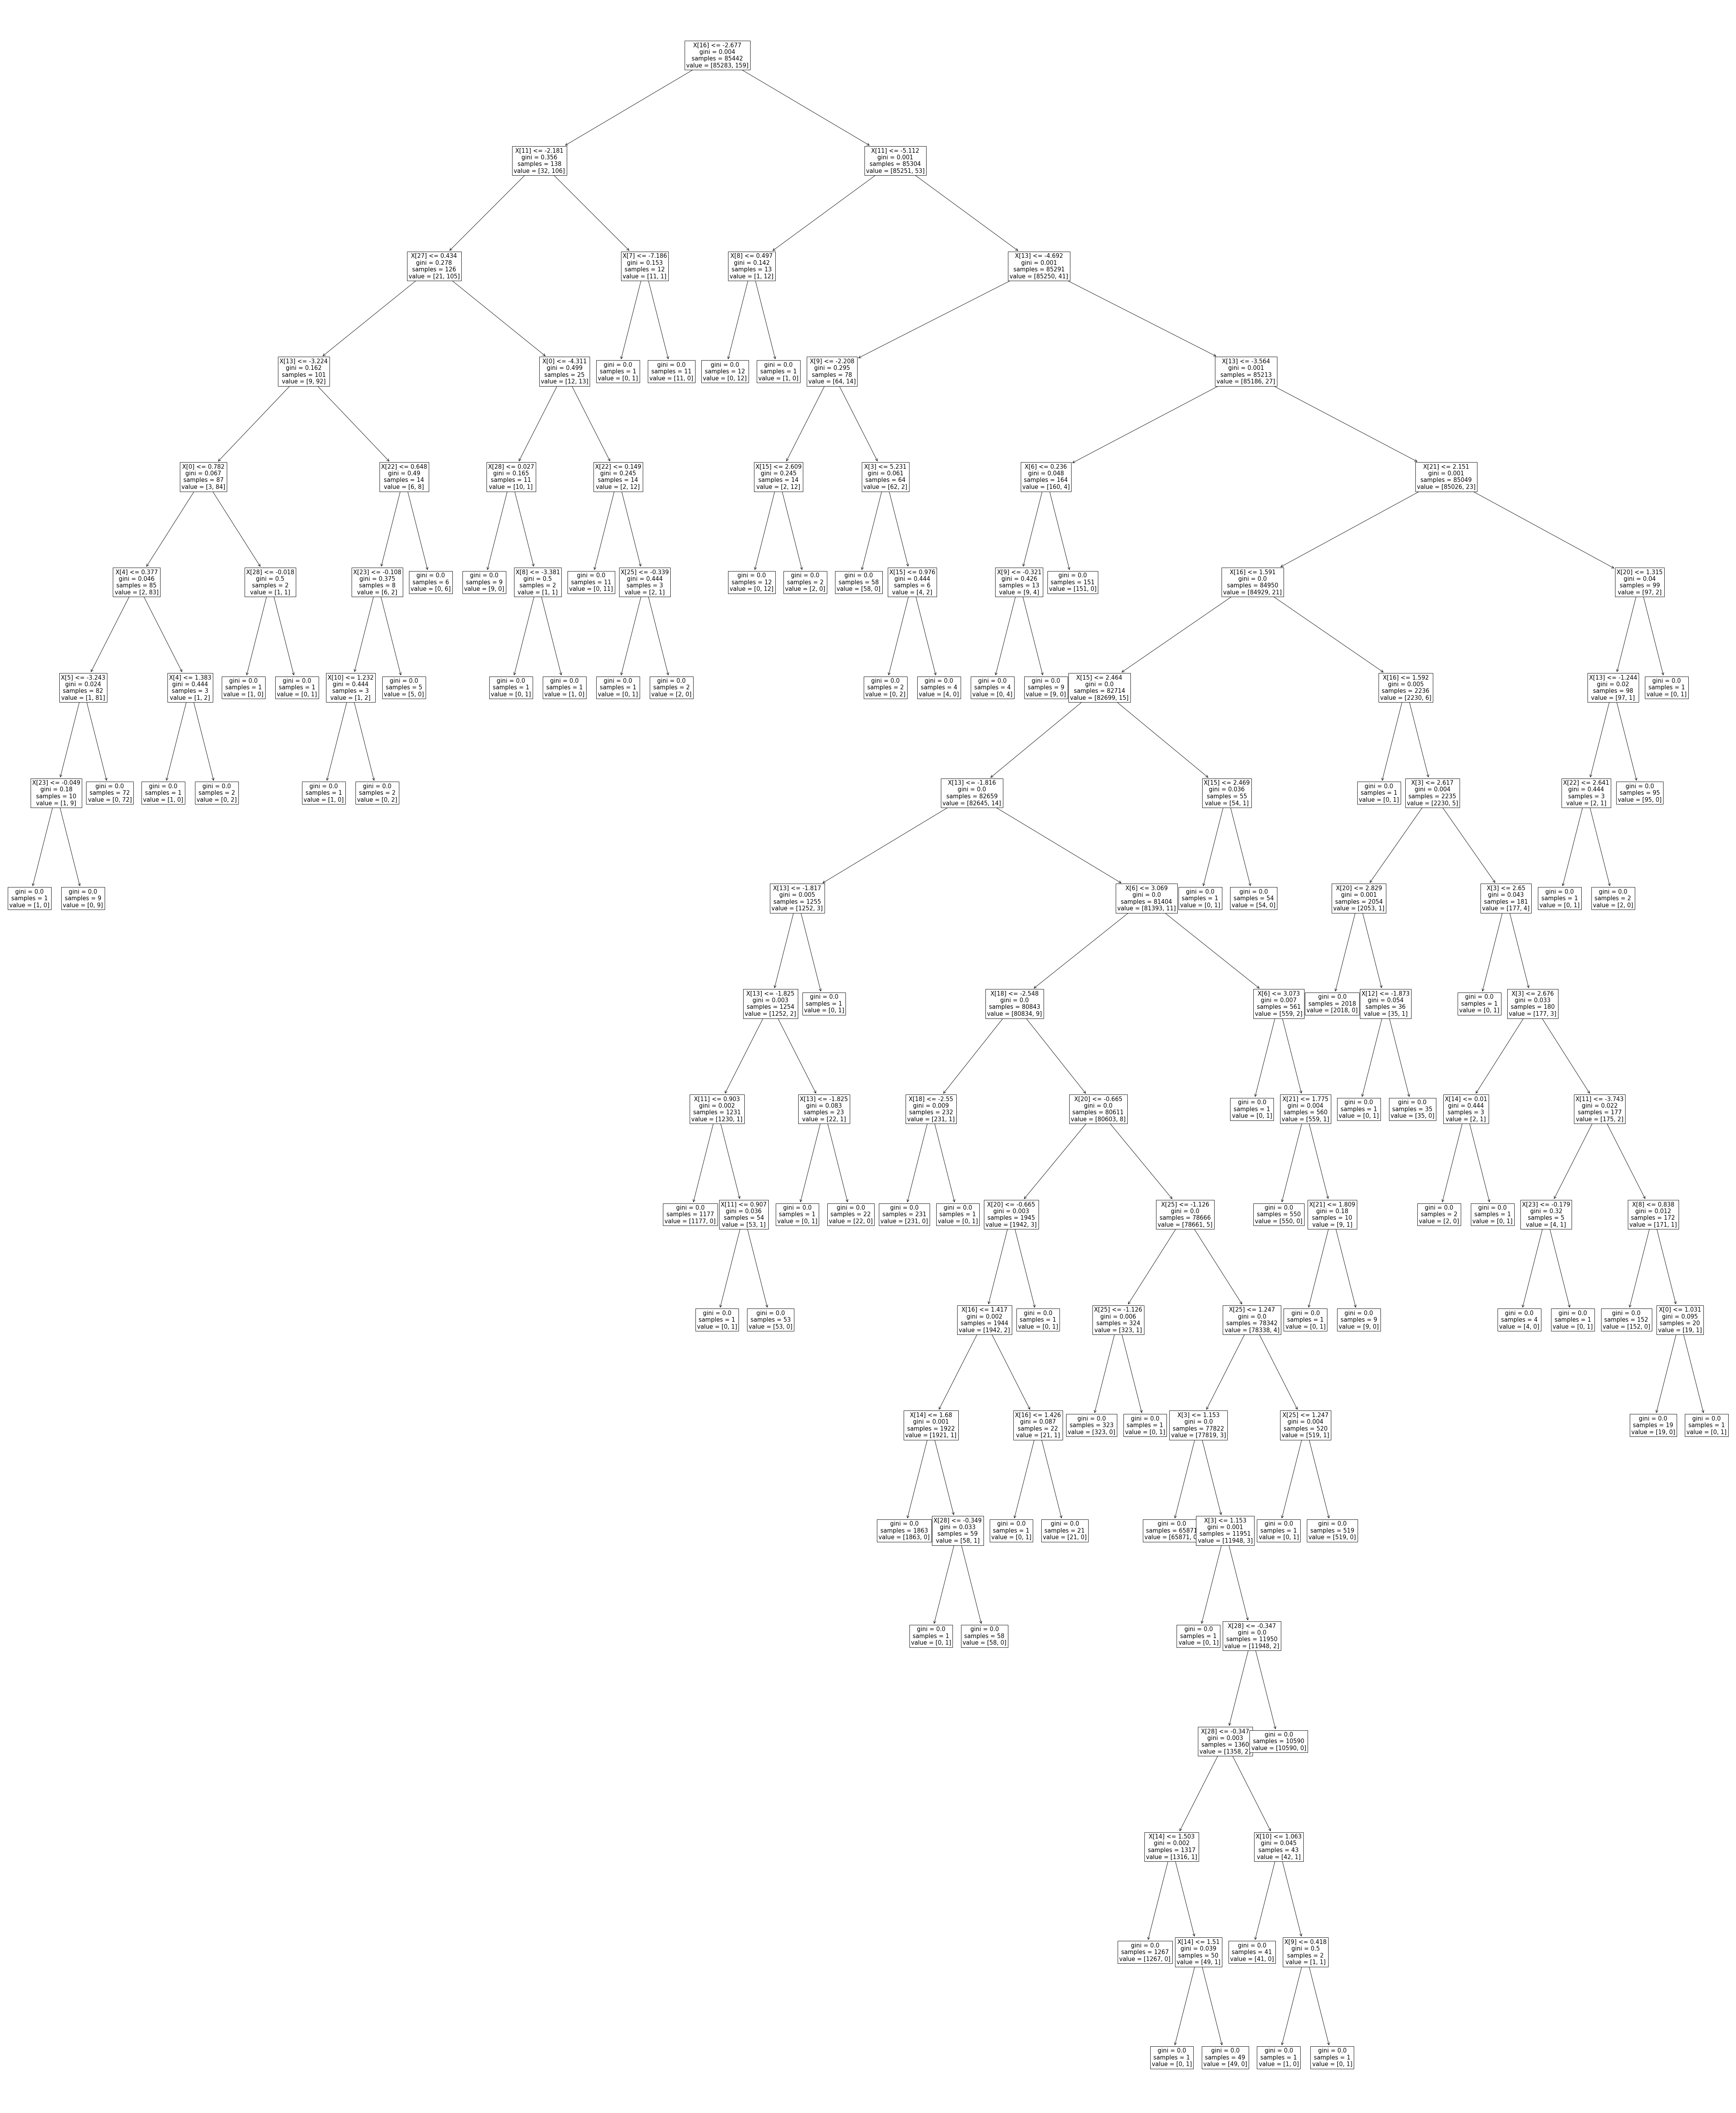

In [ ]:
fig, ax = plt.subplots(figsize=(80, 100))
plot_tree(model1, fontsize = 15);

In [ ]:
y2_pred
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y2_pred)
print("Random Forest:\n\n", classification_report(y_test, y2_pred))

Random Forest:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199032
           1       0.91      0.77      0.84       333

    accuracy                           1.00    199365
   macro avg       0.96      0.89      0.92    199365
weighted avg       1.00      1.00      1.00    199365



#**Explaination** :
The main motive of this project is to detect the credit card fraud transactions. The first step would be importing libraries that are numpy,  pandas, matplotlib then we would need to read our dataset and describing the data present in the dataset. Ater describing the data we would need to check that is their and null values in the dataset and handle it properly. After handling the null values we would need to do data visualization that is we would need to repersent data present in dataset in the form of graphs or charts. 

Then we would need to define target variable y and Feature variable X. Know we would to split data arrays into two subsets for training and testing the data.